In [1]:
from skeleton import *
from coco import KeyPoint

In [2]:
coco = Coco()
coco.load_annotations()

In [3]:
#metadata_image["keypoints"]

index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0
index 0 is out of bounds for dimension 0 with size 0


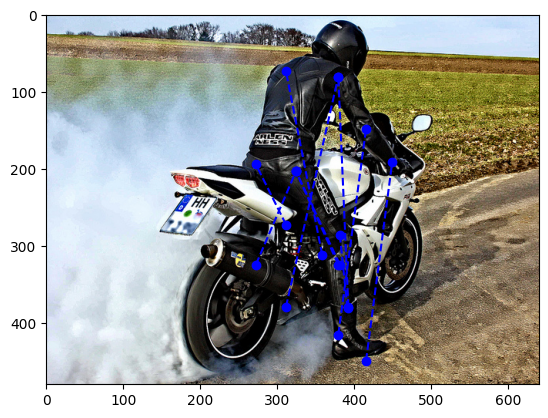

In [11]:
metadata_image = coco.get_metadata(6)
skeleton = Skeleton(
    img_shape=(480, 640),
    skeleton=metadata_image["skeleton"],
    keypoints=metadata_image["keypoints"]
)
skeleton.sigma = 5

keypoints_merged = list(skeleton.merge(
    skeleton.confidence_map(),
    skeleton.paf_field()
))
coco.results[6].plot_image_skeleton_keypoints(keypoints_merged)

In [5]:
from model import *

In [13]:
net = Net()
image = transforms.ToTensor()(Image.open(metadata_image['path']))
print(image.shape)
print(skeleton.confidence_map().shape)
print(skeleton.annotation_map().shape)
trainer = Trainer(net)
trainer.step(
    image.reshape((1, ) + image.shape), 
    skeleton.confidence_map(),
    skeleton.paf_field(),
    skeleton.annotation_map(),
)

Using cache found in /home/brage/.cache/torch/hub/pytorch_vision_v0.10.0


torch.Size([3, 480, 640])
torch.Size([17, 480, 640])
torch.Size([480, 640])
tensor(71140.6250, grad_fn=<DivBackward0>)
tensor(65472.2383, grad_fn=<DivBackward0>)
tensor(63677.8711, grad_fn=<DivBackward0>)
tensor(61783.4609, grad_fn=<DivBackward0>)
tensor(59759.0391, grad_fn=<DivBackward0>)
tensor(57619.5859, grad_fn=<DivBackward0>)
tensor(55181.4336, grad_fn=<DivBackward0>)
tensor(52580.8789, grad_fn=<DivBackward0>)
tensor(50200.2656, grad_fn=<DivBackward0>)
tensor(47468.3906, grad_fn=<DivBackward0>)


In [7]:
confidence, paf = net(image.reshape((1, ) + image.shape))

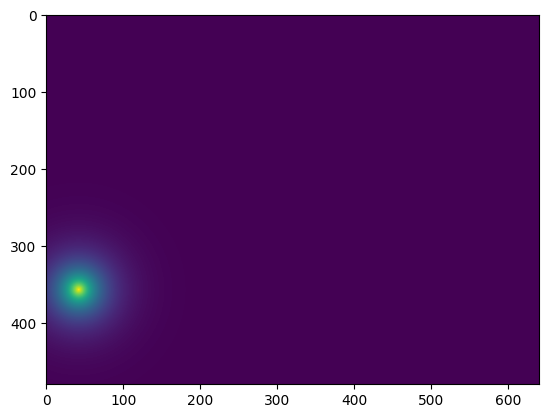

In [12]:
import matplotlib.pyplot as plt 

plt.imshow(skeleton.confidence_map()[3])

In [9]:
#confidence[0][3]

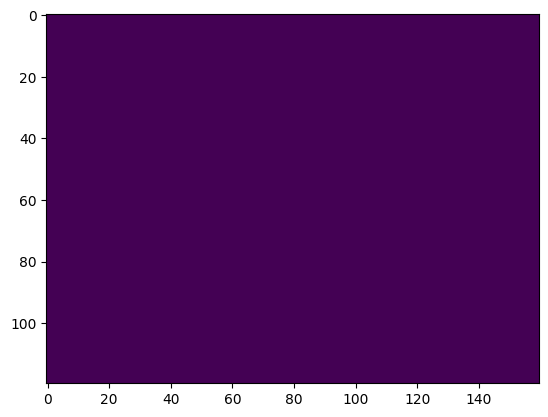

In [16]:
import matplotlib.pyplot as plt

plt.imshow(confidence[0][4].detach().numpy())